---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#PCA TUTORIAL


The main purposes of a principal component analysis are the analysis of data to identify patterns and finding patterns to reduce the dimensions of the dataset with minimal loss of information.

Here, our desired outcome of the principal component analysis is to project a feature space (our dataset consisting of n d-dimensional samples) onto a smaller subspace that represents our data “well”. A possible application would be a pattern classification task, where we want to reduce the computational costs and the error of parameter estimation by reducing the number of dimensions of our feature space by extracting a subspace that describes our data “best”.

###What is a good subspace?

Let’s assume that our goal is to reduce the dimensions of a d-dimensional dataset by projecting it onto a (k)-dimensional subspace (where k<d). So, how do we know what size we should choose for k, and how do we know if we have a feature space that represents our data “well”?
Later, we will compute eigenvectors (the components) from our data set and collect them in a so-called scatter-matrix (or alternatively calculate them from the covariance matrix). Each of those eigenvectors is associated with an eigenvalue, which tell us about the “length” or “magnitude” of the eigenvectors. If we observe that all the eigenvalues are of very similar magnitude, this is a good indicator that our data is already in a “good” subspace. Or if some of the eigenvalues are much much higher than others, we might be interested in keeping only those eigenvectors with the much larger eigenvalues, since they contain more information about our data distribution. Vice versa, eigenvalues that are close to 0 are less informative and we might consider in dropping those when we construct the new feature subspace.

##Summarizing the PCA approach
Listed below are the 6 general steps for performing a principal component analysis, which we will investigate in the following sections.

Take the whole dataset consisting of $d$-dimensional samples 

1.   Take the whole dataset consisting of $d$-dimensional samples ignoring the class labels
2.   Compute the d-dimensional mean vector (i.e., the means for every dimension of the whole dataset)
3.  Compute the scatter matrix (alternatively, the covariance matrix) of the whole data set
4.  Compute eigenvectors $(e_1,e_2,...,e_d)$ and corresponding eigenvalues $(λ_1,λ_2,...,λ_d)$
5.  Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a $d×k$ dimensional matrix WW(where every column represents an eigenvector)
6.  Use this d×k eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the mathematical equation: $yy=W^T×x$ (where $x$ is a $d×1$-dimensional vector representing one sample, and $y$ is the transformed $k×1$-dimensional sample in the new subspace.)





-----------------------------------------------------------------

###Generate Samples
For the following example, we will generate 40 **3-dimensional** samples randomly drawn from a **multivariate Gaussian distribution**.
Here, we will assume that the samples stem from two different classes, where one half (i.e., 20) samples of our data set are labeled ω1 (class 1) and the other half ω2 (class 2).


In [ ]:
# Generate samles from multivariate normal distibution
import numpy as np

np.random.seed(2) # random seed for consistency

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

###Visualise the generated samples

Using the code above, we created two 3×20 datasets - one dataset for each class ω1 and ω2 -
where each column can be pictured as a 3-dimensional vector $X =
 \begin{pmatrix}
  x_{1}\\
  x_{2}\\
  x_{3}
 \end{pmatrix}$so that our dataset will have the form:

$X = \begin{pmatrix}
  x_{1_{1}} &  x_{1_{2}} &.... & x_{1_{20}}\\
  x_{2_{1}} &  x_{2_{2}} &.... & x_{2_{20}}\\
  x_{3_{1}} & x_{3_{2}} &.... & x_{3_{20}}
   \end{pmatrix}$
   
Just to get a rough idea how the samples of our two classes ω1 and ω2 are distributed, let us plot them in a 3D scatter plot.

Populating the interactive namespace from numpy and matplotlib


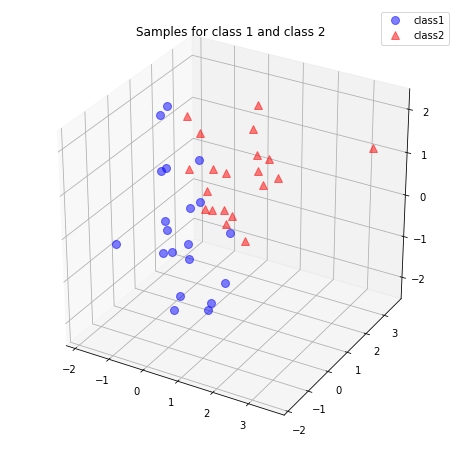

In [ ]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

###Taking the whole dataset ignoring the class labels

Because we don’t need class labels for the PCA analysis, let us merge the samples for our 2 classes into one 3×40-dimensional array.

In [ ]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

###Computing the d-dimensional mean vector

In [ ]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.4409998 ]
 [0.31490462]
 [0.49425121]]


###Computing the Scatter Matrix
The scatter matrix is computed by the following equation:

$
S = \sum^n_{k-1}(x_k-m)(x_k-m)^T
$

where m is the mean vector,

$
m = (1/n)\sum^n_{k=1}x_k
$

In [ ]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[50.50083594 -5.61897403 14.27132997]
 [-5.61897403 57.89958677  3.89835077]
 [14.27132997  3.89835077 58.58373802]]


###Computing the Covariance Matrix (alternatively to the scatter matrix)
Alternatively, instead of calculating the scatter matrix, we could also calculate the covariance matrix using the in-built numpy.cov() function. The equations for the covariance matrix and scatter matrix are very similar, the only difference is, that we use the scaling factor $1/(N−1)$ (here: 1/(40−1)=1/39) for the covariance matrix. Thus, their eigenspaces will be identical (identical eigenvectors, only the eigenvalues are scaled differently by a constant factor).

$\sum_i = \begin{pmatrix}
  σ_{11}^2 &  σ_{12}^2 & σ_{13}^2\\
  σ_{21} &  σ_{22}^2 & σ_{23}^2\\
  σ_{31} & σ_{32}^2 & σ_{33}^2
   \end{pmatrix}$

In [ ]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.29489323 -0.14407626  0.36593154]
 [-0.14407626  1.48460479  0.09995771]
 [ 0.36593154  0.09995771  1.50214713]]


###Computing eigenvectors and corresponding eigenvalues
To show that the eigenvectors are indeed identical whether we derived them from the scatter or the covariance matrix, let us put an assert statement into the code. Also, we will see that the eigenvalues were indeed scaled by the factor 39 when we derived it from the scatter matrix.

In [ ]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[ 0.75826512]
 [ 0.31665604]
 [-0.56987977]]
Eigenvalue 1 from scatter matrix: 37.42859500297598
Eigenvalue 1 from covariance matrix: 0.9597075641788713
Scaling factor:  39.0
----------------------------------------
Eigenvector 2: 
[[ 0.60805413]
 [-0.02818996]
 [ 0.79339492]]
Eigenvalue 2 from scatter matrix: 69.38270652013392
Eigenvalue 2 from covariance matrix: 1.7790437569265107
Scaling factor:  39.0
----------------------------------------
Eigenvector 3: 
[[-0.23516841]
 [ 0.94812145]
 [ 0.21391948]]
Eigenvalue 3 from scatter matrix: 60.17285920800877
Eigenvalue 3 from covariance matrix: 1.5428938258463782
Scaling factor:  39.00000000000001
----------------------------------------


###Checking the eigenvector-eigenvalue calculation
Let us quickly check that the eigenvector-eigenvalue calculation is correct and satisfy the equation

$Σv=λv$

where

$Σ=Covariancematrix$

$v=Eigenvector$

$λ=Eigenvalue$

In [ ]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

Populating the interactive namespace from numpy and matplotlib


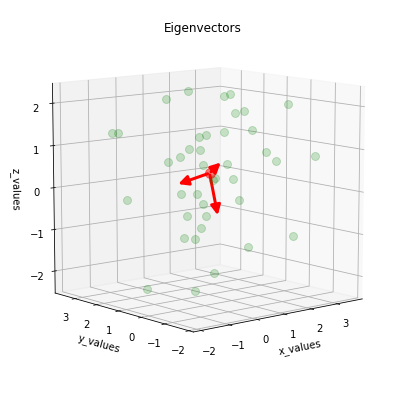

In [ ]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')
ax.view_init(10,230)
plt.title('Eigenvectors')

plt.show()

###Sorting the eigenvectors by decreasing eigenvalues
We started with the goal to reduce the dimensionality of our feature space, i.e., projecting the feature space via PCA onto a smaller subspace, where the eigenvectors will form the axes of this new feature subspace. However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1, which we can confirm by the following code:

In [ ]:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors

So, in order to decide which eigenvector(s) we want to drop for our lower-dimensional subspace, we have to take a look at the corresponding eigenvalues of the eigenvectors. Roughly speaking, the eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data, and those are the ones we want to drop.
The common approach is to rank the eigenvectors from highest to lowest corresponding eigenvalue and choose the top $k$ eigenvectors.

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

69.38270652013392
60.17285920800877
37.42859500297598


###Choosing k eigenvectors with the largest eigenvalues
For our simple example, where we are reducing a 3-dimensional feature space to a 2-dimensional feature subspace, we are combining the two eigenvectors with the highest eigenvalues to construct our $d×k$-dimensional eigenvector matrix $W$.

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.60805413 -0.23516841]
 [-0.02818996  0.94812145]
 [ 0.79339492  0.21391948]]


In [ ]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

###Transforming the samples onto the new subspace
In the last step, we use the 2×3-dimensional matrix $W$ that we just computed to transform our samples onto the new subspace via the equation $y=W^T×x$.

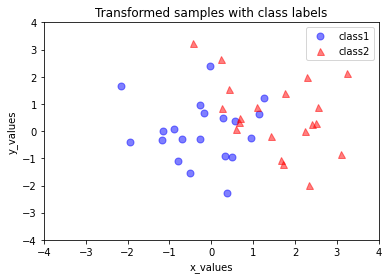

In [ ]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()


#Usign Sklearn PCA pakage

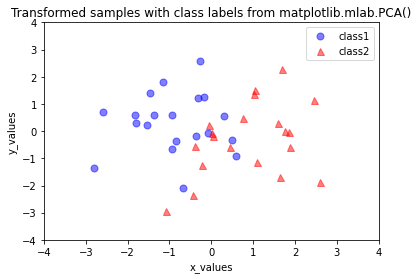

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)
sklearn_transf = sklearn_transf * (-1)

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()


----------------------------------------------------------------------------------

--------------------------------------------------------------------------------

#LDA TUTORIAL

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

In [ ]:
def generate_GMM_samples(prior,number_of_samples=400,sig1=[[1,0],[0,1]],sig2=[[1,0],[0,1]],u1=[0,0],u2=[3,3]):
    '''
    Args:
    prior : prior of class 1. (prior of class 2 = 1 - prior (automatically))
    number_of_samples
    
    class 1- u_1, sig_1
    class 2- u_2, sig_2
    
    x is samples from zero-mean identity-covariance Gaussian sample generators

    generating class 1- A1*x+b1
    generating class 2- A2*x+b2
    
    First, the sampled data from gaussians is visualized. 
    Second, the mean and variannce of the gaussians are estimated
    Third, we use Fisher LDA to find the eigenvectors with greatest variance, project the data on to that variance, 
    and find the threshold such that the error (misclassification) is minimized

    '''
    
    # Generate and plot initial samples
    
    samples_class1=[]
    samples_class2=[]
    sig_1=np.matrix(sig1)
    sig_2=np.matrix(sig2)
    u_1=np.matrix(u1).transpose()
    u_2=np.matrix(u2).transpose()
    A1=np.linalg.cholesky(sig_1)
    b1=u_1

    A2=np.linalg.cholesky(sig_2)
    b2=u_2

    zero_mean=[0,0]
    cov=[[1,0],[0,1]]
    for i in range(number_of_samples):
        uniform_sample=np.random.uniform()
        sample_from_zero_mean_identity_covariance=np.random.multivariate_normal(zero_mean,cov,[1]).transpose()

        if uniform_sample<prior:
            '''sample from class 1class 1'''
            sample=A1.dot(sample_from_zero_mean_identity_covariance)+b1
            samples_class1.append(sample)
        else:
            sample=A2.dot(sample_from_zero_mean_identity_covariance)+b2
            samples_class2.append(sample)
    samples_class1_final=np.hstack(samples_class1)
    samples_class2_final=np.hstack(samples_class2)
    a=np.squeeze(np.asarray(samples_class1_final.transpose()[:,1]))
    b=np.squeeze(np.asarray(samples_class1_final.transpose()[:,0]))

    c=np.squeeze(np.asarray(samples_class2_final.transpose()[:,1]))
    d=np.squeeze(np.asarray(samples_class2_final.transpose()[:,0]))
    from matplotlib.pyplot import figure
    figure(figsize=(10, 8))
    plt.scatter(b,a,label='1st gaussian')
    plt.scatter(d,c,label='2nd gaussian')
    plt.title('Plot of samples drawn from two 2D gaussians',fontsize=15)
    plt.xlabel('x1',fontsize=12)
    plt.ylabel('x2',fontsize=12)
    plt.legend()
    #plt.show()


    # Estimate mean and variance of the samples
    sig1=np.cov(samples_class1_final)
    sig2=np.cov(samples_class1_final)
    u1=np.mean(samples_class1_final,axis=1)
    u2=np.mean(samples_class2_final,axis=1)
    sig_1=np.matrix(sig1)
    sig_2=np.matrix(sig2)
    u_1=np.matrix(u1)#.transpose()
    u_2=np.matrix(u2)#.transpose()
    
    
    # Fisher LDA math to find eigenvectors. Plot the original samples along eigenvector axes
    
    Sw=sig_1+sig_2
    Sb=np.matmul((u_1-u_2),((u_1-u_2).transpose()))
    main_matrix=np.matmul((np.linalg.inv(Sw)),Sb)
    #plt.show()
    #print (Sw,"\n",Sb,"\n",main_matrix,"\n")
    a,b=np.linalg.eig(main_matrix)
    b=b.transpose()
    #print (a,b)
        
    # Plot the original samples along eigenvector axes
    figure(figsize=(10, 8))
    d=(np.asarray(b)*samples_class1_final).transpose()
    plt.scatter(np.squeeze(np.asarray(d[:,1])),np.squeeze(np.asarray(d[:,0])),label='1st gaussian')
    
    d=(np.asarray(b)*samples_class2_final).transpose()
    plt.scatter(np.squeeze(np.asarray(d[:,1])),np.squeeze(np.asarray(d[:,0])),label='2nd gaussian')
    plt.title('Samples drawn from two 2D gaussians, projected on to their eigenvector axis',fontsize=15)
    plt.xlabel('x1',fontsize=12)
    plt.ylabel('x2',fontsize=12)
    plt.legend()
    #plt.show()
    
    
    # Fisher 1D projection
    
    d1=(np.asarray(b)*samples_class1_final).transpose()
    figure(figsize=(10, 8))
    plt.scatter(np.squeeze(np.asarray(d1[:,1])),np.zeros(len(np.squeeze(np.asarray(d1[:,1])))),label='1st gaussian')

    d2=(np.asarray(b)*samples_class2_final).transpose()
    #figure(figsize=(8, 6))
    plt.scatter(np.squeeze(np.asarray(d2[:,1])),np.zeros(len(np.squeeze(np.asarray(d2[:,1])))),label='2nd gaussian')
    plt.title('Fisher LDA projection of the 2 gaussian distributions',fontsize=15)
    plt.xlabel('x1',fontsize=12)
    plt.ylabel('x2',fontsize=12)
    plt.legend()
    #figure(figsize=(10, 8))
    plt.show()
    #figure(figsize=(10, 8))
    
    
    # Calculate and plot misclassification for different thresholds
    min_error=10000
    error_dict={}
    save_threshold=None
    for threshold in np.linspace(-6,3,50):
        error=0
        for sample in np.squeeze(np.asarray(d1[:,1])):
            if sample<threshold:
                error=error+1
        for sample in np.squeeze(np.asarray(d2[:,1])):
            if sample>threshold:
                error=error+1
        error_dict[threshold]=error
        if error<min_error:
            min_error=error
            save_threshold=threshold
    figure(figsize=(10, 8))
    for keys in error_dict:
        plt.scatter(keys,error_dict[keys])
    plt.title('Plot of misclassification vs Fisher LDA threshold',fontsize=15)
    plt.xlabel('Fisher LDA threshold',fontsize=12)
    plt.ylabel('Misclassification',fontsize=12)
    plt.show()
    print ("\nBest threshold is {} with {} misclassifications".format(np.around(save_threshold,4),min_error))

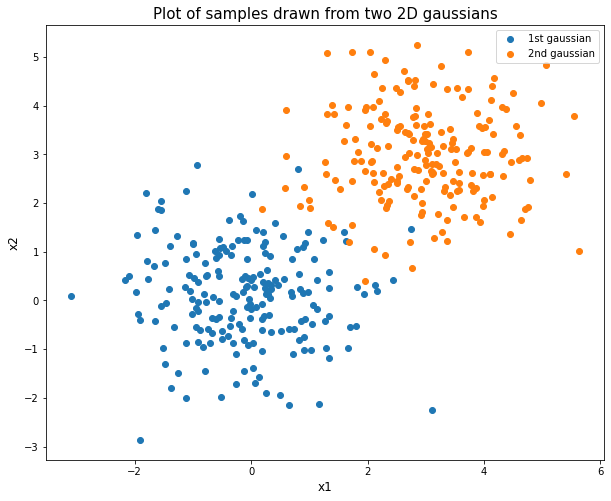

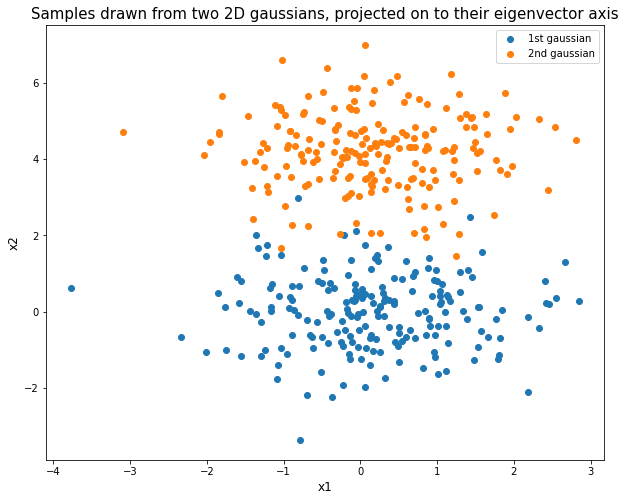

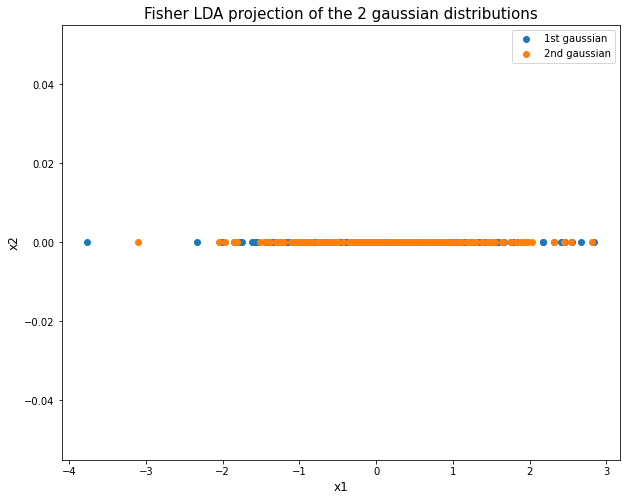

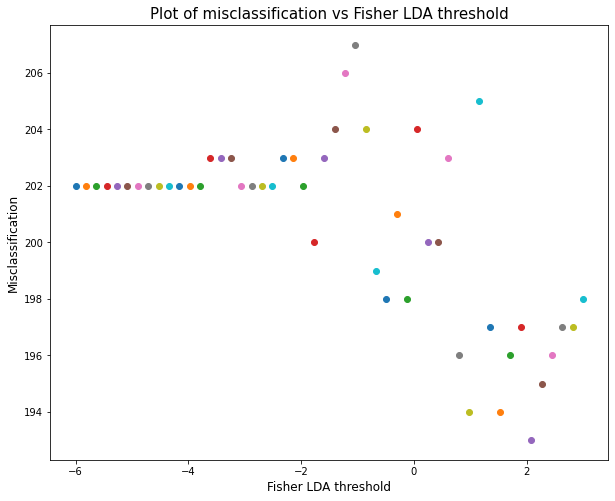


Best threshold is 2.0816 with 193 misclassifications


In [ ]:
generate_GMM_samples(prior=0.5,number_of_samples=400,sig1=[[1,0],[0,1]],sig2=[[1,0],[0,1]],u1=[0,0],u2=[3,3])

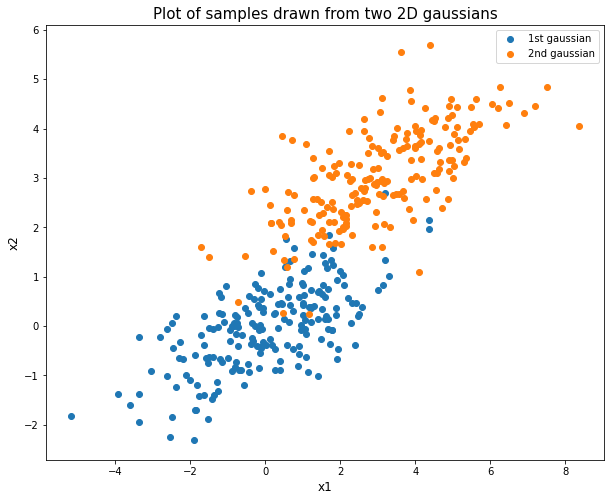

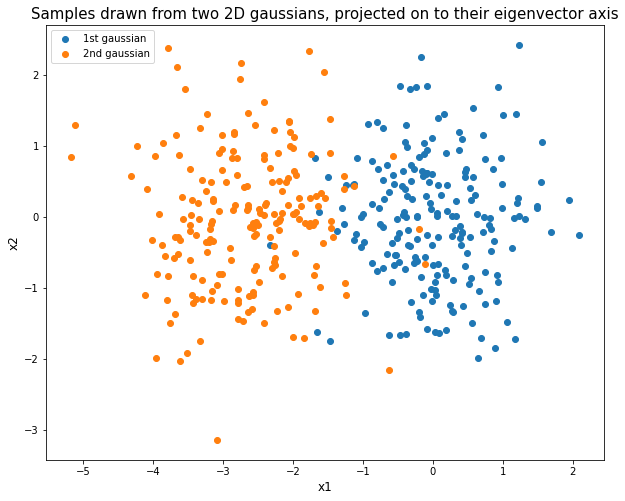

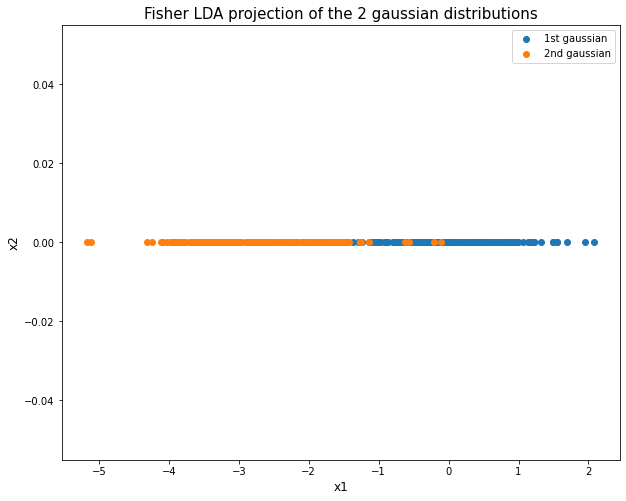

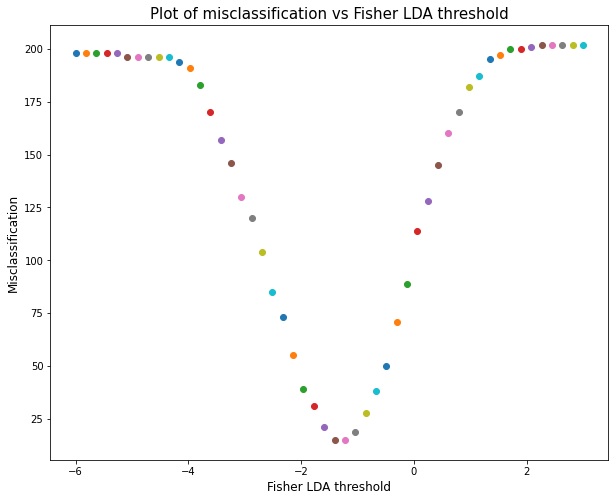


Best threshold is -1.4082 with 15 misclassifications


In [ ]:
generate_GMM_samples(prior=0.5,number_of_samples=400,sig1=[[3,1],[1,0.8]],sig2=[[3,1],[1,0.8]],u1=[0,0],u2=[3,3])

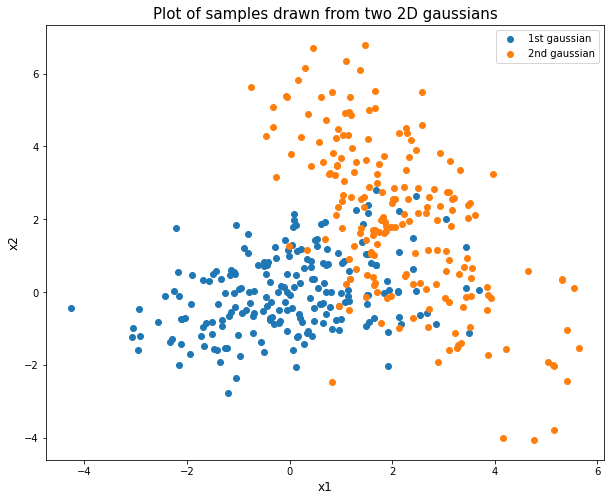

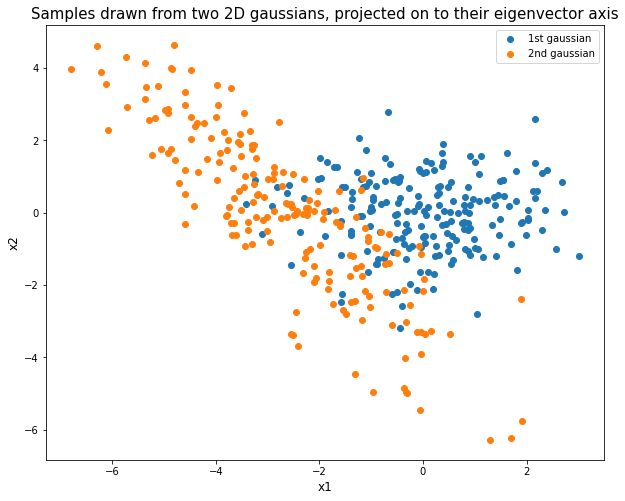

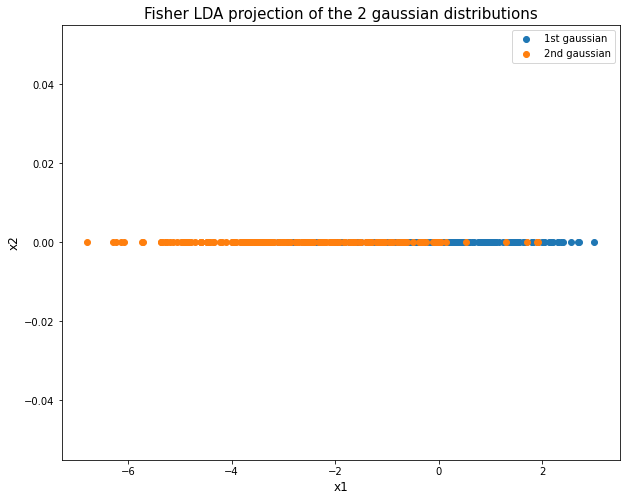

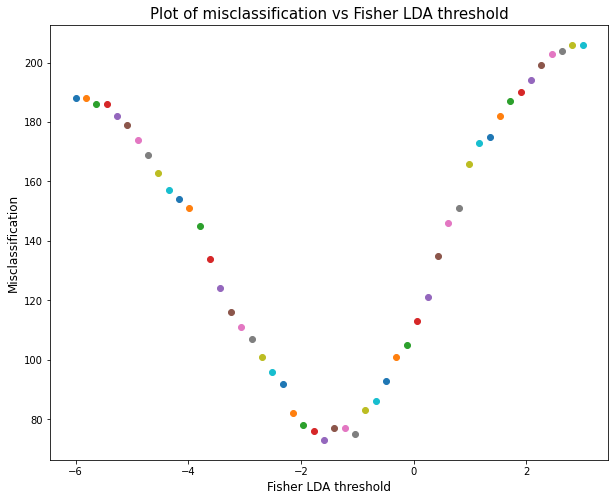


Best threshold is -1.5918 with 73 misclassifications


In [ ]:
generate_GMM_samples(prior=0.5,number_of_samples=400,sig1=[[2,0.5],[0.5,1]],sig2=[[2,-1.9],[-1.9,5]],u1=[0,0],u2=[2,2])

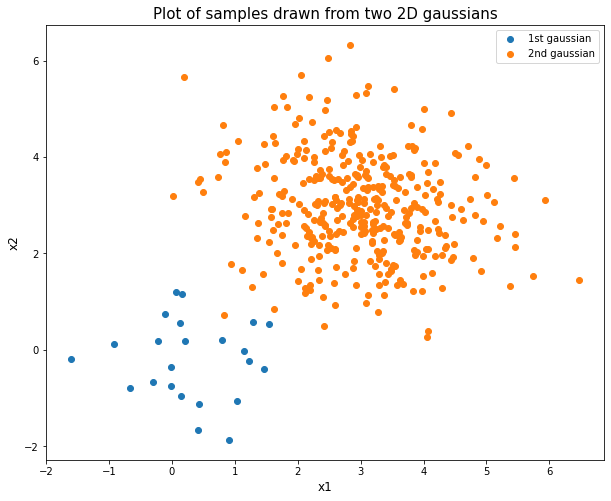

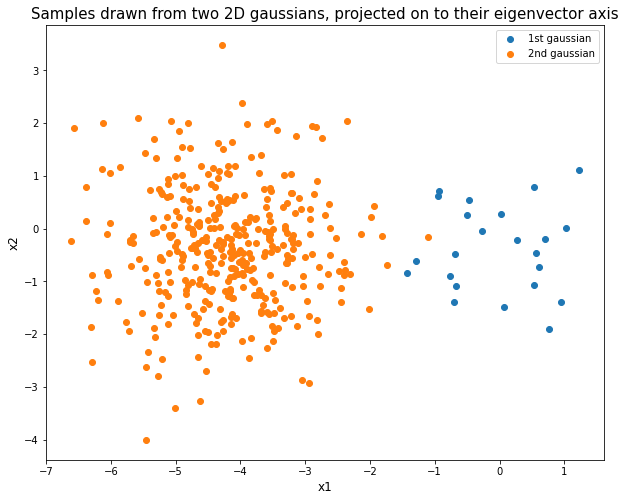

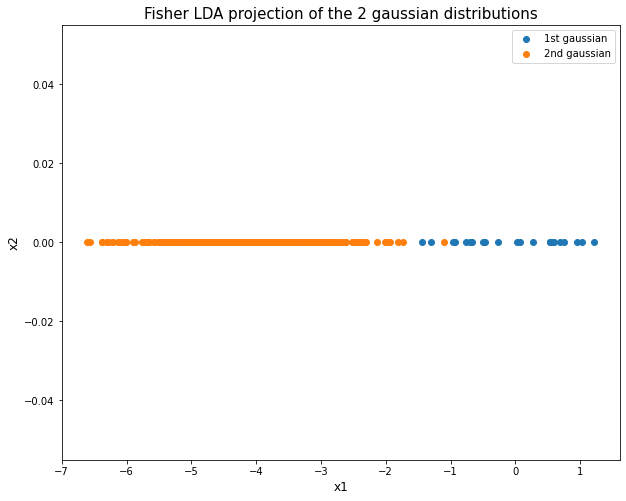

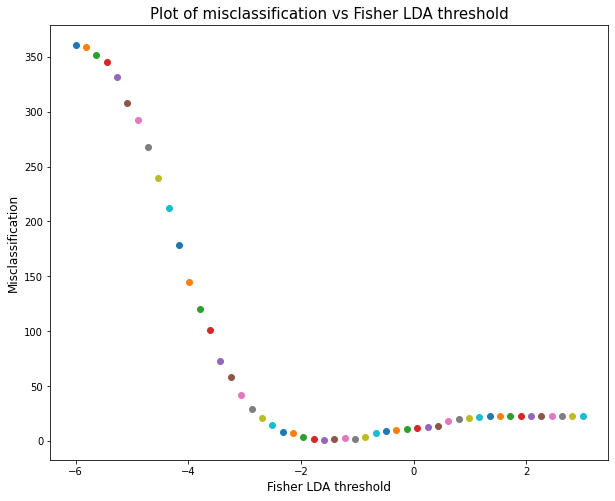


Best threshold is -1.5918 with 1 misclassifications


In [ ]:
generate_GMM_samples(prior=0.05,number_of_samples=400,sig1=[[1,0],[0,1]],sig2=[[1,0],[0,1]],u1=[0,0],u2=[3,3])

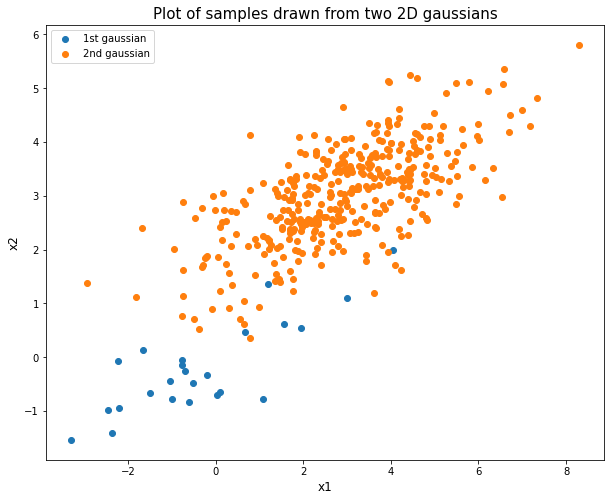

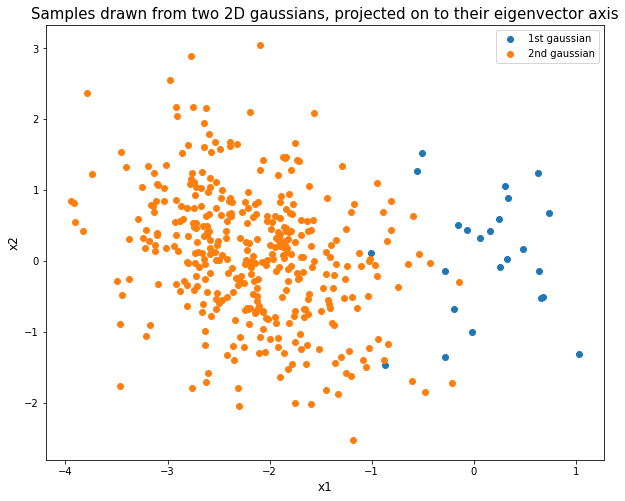

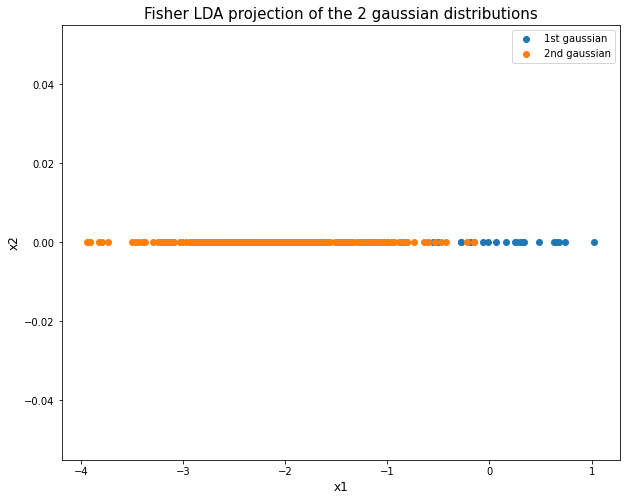

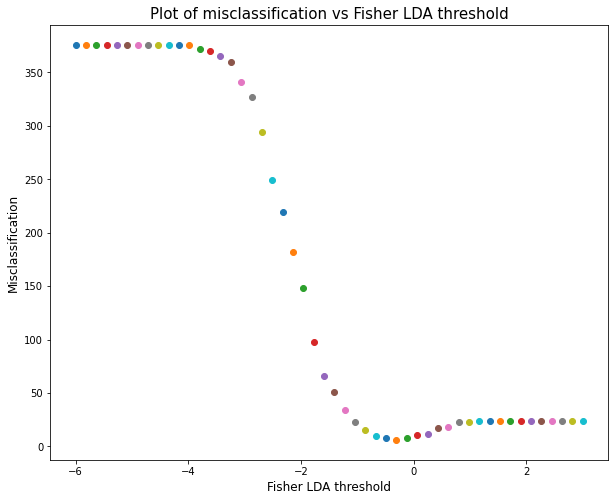


Best threshold is -0.3061 with 6 misclassifications


In [ ]:
generate_GMM_samples(prior=0.05,number_of_samples=400,sig1=[[3,1],[1,0.8]],sig2=[[3,1],[1,0.8]],u1=[0,0],u2=[3,3])

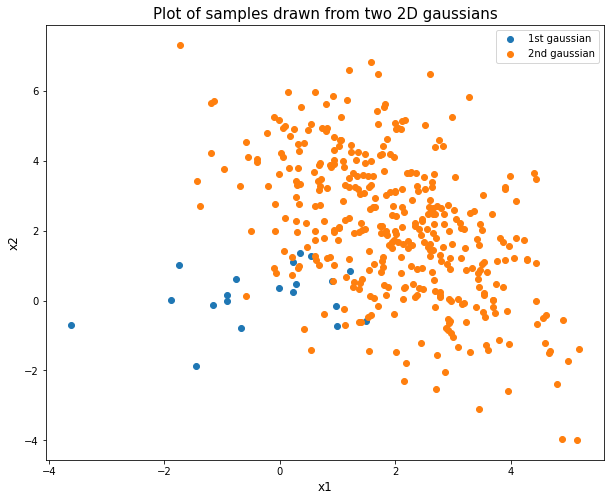

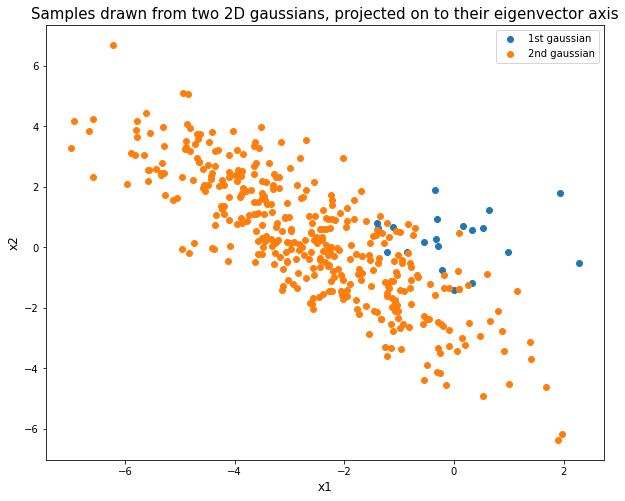

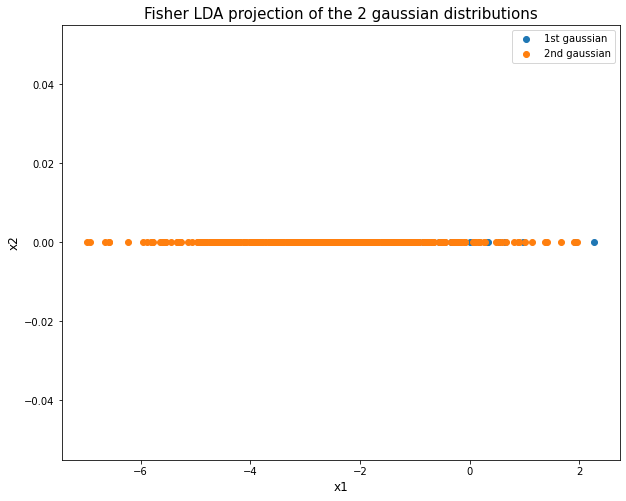

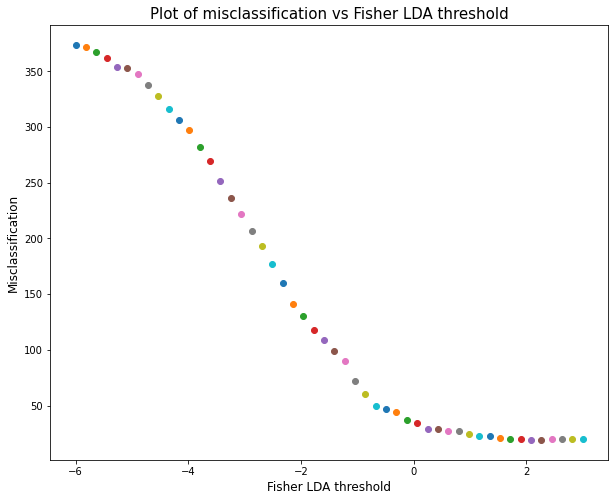


Best threshold is 2.0816 with 19 misclassifications


In [ ]:
generate_GMM_samples(prior=0.05,number_of_samples=400,sig1=[[2,0.5],[0.5,1]],sig2=[[2,-1.9],[-1.9,5]],u1=[0,0],u2=[2,2])

#------------------------------------------------------------------------------------------------------------------------------------------

#Quiz

#True or False
When the variables have different physical dimensions, they must be made dimensionless by standardization or ranging before PCA.

Answer: True. PCA tries to maximise the variance along the principal component. It does not recognize the physical dimensions.

#Multiple Choice
The most popularly used dimensionality reduction algorithm is Principal Component Analysis (PCA). Which of the following is/are true about PCA?

   1 PCA is an unsupervised method

   2 It searches for the directions that data have the largest variance

   3 Maximum number of principal components <= number of features

   4 All principal components are orthogonal to each other


A. 1 and 2

B. 1 and 3

C. 2 and 3

D. 1, 2 and 3

E. 1,2 and 4

F. All of the above

Answer F

\\
Suppose we are using dimensionality reduction as pre-processing technique, i.e, instead of using all the features, we reduce the data to k dimensions with PCA. And then use these PCA projections as our features. Which of the following statement is correct?

A. Higher ‘k’ means more regularization

B. Higher ‘k’ means less regularization

C. Can’t Say

Answer: (B)

Higher k would lead to less smoothening as we would be able to preserve more characteristics in data, hence less regularization.

\\
Which of the following is true about LDA?


A. LDA aims to maximize the distance between class and minimize the within class distance

B. LDA aims to minimize both distance between class and distance within class

C. LDA aims to minimize the distance between class and maximize the distance within class

D. LDA aims to maximize both distance between class and distance within class

Solution: (A)

Option A is correct.

\\

In which of the following case LDA will fail?

A. If the discriminatory information is not in the mean but in the variance of the data

B. If the discriminatory information is in the mean but not in the variance of the data

C. If the discriminatory information is in the mean and variance of the data

D. None of these

Solution: (A)

Option A is correct

\\

Which of the following comparison(s) are true about PCA and LDA?

  Both LDA and PCA are linear transformation techniques

  LDA is supervised whereas PCA is unsupervised

  PCA maximize the variance of the data, whereas LDA maximize the separation between different classes,

A. 1 and 2

B. 2 and 3

C. 1 and 3

D. Only 3

E. 1, 2 and 3

Solution: (E)

All of the options are correct

\\

Which of the following method would result into better class prediction?

A. Building a classification algorithm with PCA (A principal component in direction of PCA)

B. Building a classification algorithm with LDA

C. Can’t say

D. None of these

Solution: (B)

If our goal is to classify these points, PCA projection does only more harm than good—the majority of blue and red points would land overlapped on the first principal component.hence PCA would confuse the classifier.

--------------------------------------------------------------------------------------------------------------------------------------

#Homework

Breast Cancer

The Breast Cancer data set is a real-valued multivariate data that consists of two classes, where each class signifies whether a patient has breast cancer or not. The two categories are: malignant and benign.

The malignant class has 212 samples, whereas the benign class has 357 samples.

It has 30 features shared across all classes: radius, texture, perimeter, area, smoothness, fractal dimension, etc.

You can download the breast cancer dataset from here, or rather an easy way is by loading it with the help of the sklearn library.

QUESTION: Perform PCA on this dataset and report explainable variance.

In [31]:
import matplotlib.pyplot as plt

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
breast = load_breast_cancer()

In [3]:
breast_data = breast.data

In [4]:
breast_data.shape

(569, 30)

In [5]:
breast_labels = breast.target

In [6]:
breast_labels.shape

(569,)

In [7]:
import numpy as np

In [8]:
labels = np.reshape(breast_labels,(569,1))

In [9]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [10]:
final_breast_data.shape

(569, 31)

In [11]:
import pandas as pd

In [12]:
breast_dataset = pd.DataFrame(final_breast_data)

In [13]:
features = breast.feature_names

In [14]:
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [15]:
features_labels = np.append(features,'label')

In [16]:
breast_dataset.columns = features_labels

In [17]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [18]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [19]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [20]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [21]:
x.shape

(569, 30)

In [22]:
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

In [23]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [24]:
normalised_breast = pd.DataFrame(x,columns=feat_cols)

In [25]:
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,-0.070279,0.383092,-0.157449,-0.466152,0.049342,-1.163516,-1.057501,-1.913447,0.752830,-0.382754,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [26]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [27]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])

In [28]:
principal_breast_Df.tail()


,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [29]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 432x288 with 0 Axes>

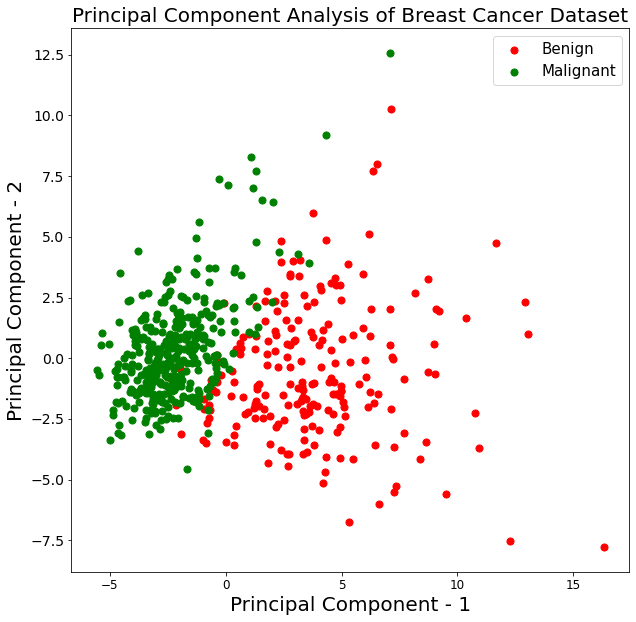

In [32]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

From the above graph, you can observe that the two classes benign and malignant, when projected to a two-dimensional space, can be linearly separable up to some extent. Other observations can be that the benign class is spread out as compared to the malignant class.